# SMS Spam Detection Project

## 1. Project Overview
This notebook builds an end-to-end SMS spam classifier using Natural Language Processing (NLP) techniques.
The objective is to classify SMS messages as either 'Ham' (legitimate) or 'Spam' (unsolicited).

**Workflow:**
1. **Data Ingestion**: Loading the dataset.
2. **Data Preprocessing**: Cleaning, removal of unused columns, and target encoding.
3. **Exploratory Data Analysis (EDA)**: analyzing data distribution and structural features.
4. **Feature Engineering**: Creating new features like character, word, and sentence counts.
5. **Text Preprocessing**: Tokenization, stopword removal, and stemming.
6. **Visual Analysis**: Word clouds and frequency distributions.

## 2. Configuration & Setup
We begin by importing the necessary libraries for data manipulation and mathematical operations.

In [1]:
# Core Data Science Utilities
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations

# Encoder for converting text labels (ham/spam) into numbers (0/1)
from sklearn.preprocessing import LabelEncoder

## 3. Data Ingestion
Loading the SMS Spam Collection dataset from the CSV file.

In [2]:
# Read the CSV file
# 'ISO-8859-1' encoding is used to handle special characters often found in SMS data
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

## 4. Data Preprocessing
We clean the dataset by removing unnecessary columns generated during import and standardizing the column names for clarity.

In [3]:
# Drop 'Unnamed' columns which often contain parsing errors or empty data
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Renaming for standard interpretation:
# 'v1' -> 'target' (the label)
# 'v2' -> 'text' (the message content)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

### 4.1 Label Encoding
Converting categorical targets into numerical format for the machine learning model.

In [4]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Transform target labels: 'ham' becomes 0, 'spam' becomes 1
df['target'] = encoder.fit_transform(df['target'])

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Quality Check
Ensuring data integrity by checking for null values.

In [5]:
# Check for missing values in each column
df.isnull().sum()

target    0
text      0
dtype: int64

### 5.2 Duplicate Handling
Identifying and removing duplicate text messages to prevent bias in the model.

In [6]:
# Count the number of duplicate rows
df.duplicated().sum()

np.int64(403)

In [7]:
# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(keep='first', inplace=True)

In [8]:
# Verify the shape of the dataset after duplicate removal
df.shape

(5169, 2)

### 5.3 Target Distribution Analysis
Checking the balance between Spam (1) and Ham (0) messages.

In [9]:
# Get value counts for each class
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

#### Visualizing Class Imbalance
A pie chart to visualize the proportion of spam vs legitimate messages.

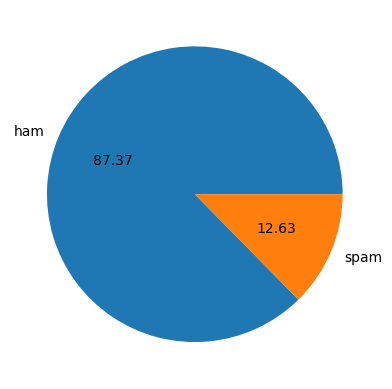

In [10]:
import matplotlib.pyplot as plt

# Generate a pie chart
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

### 5.4 NLP Library Setup
Installing and importing NLTK (Natural Language Toolkit) for text processing.

In [11]:
# Install NLTK (if not already installed)
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import nltk

In [13]:
# Download required NLTK data packages
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarogya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aarogya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 6. Feature Engineering
We extract new features from the raw text to help the model distinguish between spam and ham.

### 6.1 Character Count
Calculating the total length (number of characters) of each message.

In [14]:
# Create 'num_characters' column
df['num_characters'] = df['text'].apply(len)

In [15]:
# Preview the dataframe with the new feature
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### 6.2 Word Count
Calculating the number of words in each message.

In [16]:
# Calculate word count using NLTK word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


### 6.3 Sentence Count
Calculating the number of sentences in each message.

In [18]:
# Calculate sentence count using NLTK sent_tokenize
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [19]:
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [20]:
# Import seaborn for statistical data visualization
import seaborn as sns

### 6.4 Visualizing Feature Distributions
Comparing the character count distribution for Spam vs Ham messages.

<Axes: xlabel='num_characters', ylabel='Count'>

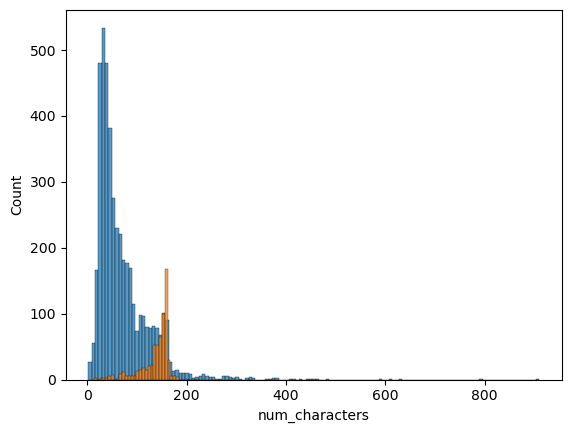

In [21]:
# Plot separate histograms for Ham (target=0) and Spam (target=1)
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

### 6.5 Pairwise Relationships
Visualizing relationships between all numerical features (characters, words, sentences) to identify separation separation patterns.

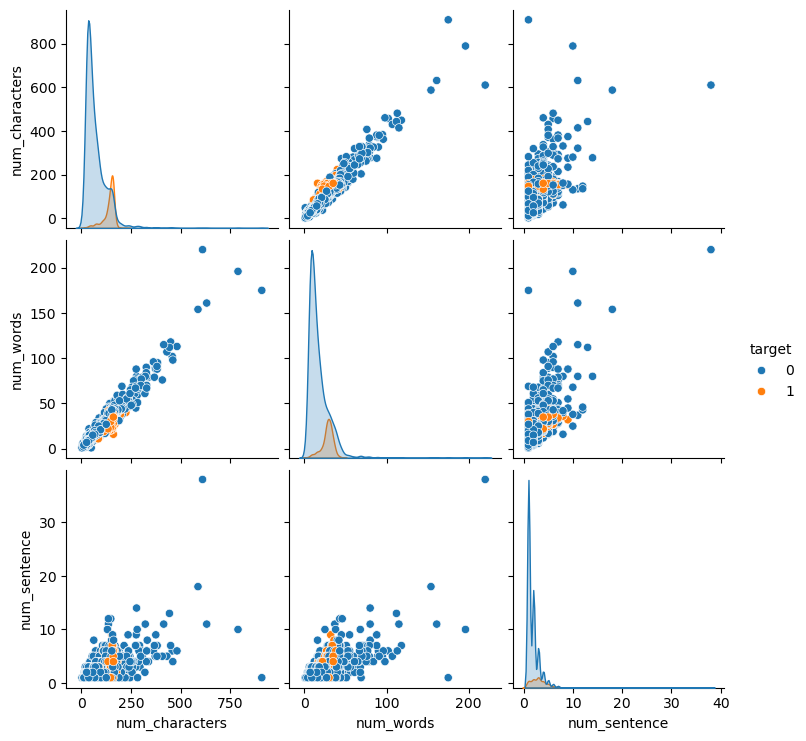

In [22]:
# Create a pairplot colored by target class
sns.pairplot(df, hue='target')

### 6.6 Correlation Matrix
Examining the correlation between the numerical features.

<Axes: >

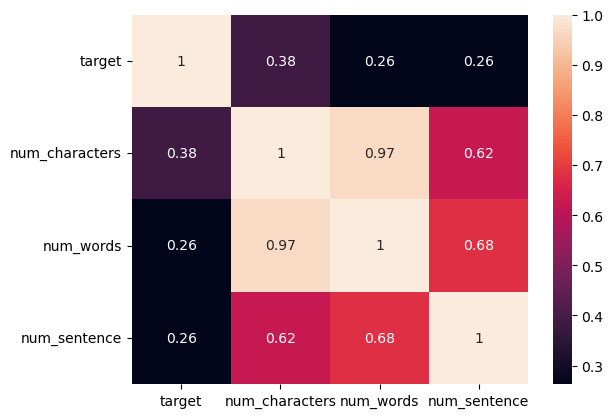

In [23]:
# Display heatmap of correlations
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## 7. Text Preprocessing Pipeline
Preparing the text data for modeling by applying a transformation pipeline:
1.  **Lowercasing**: Converting to lowercase.
2.  **Tokenization**: Splitting text into words.
3.  **Special Character Removal**: Removing non-alphanumeric characters.
4.  **Stopword Removal**: Removing common words (is, the, of) that add little semantic meaning.
5.  **Stemming**: Reducing words to their root form (e.g., 'dancing' -> 'danc').

In [24]:
# Import stopwords list and PortStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarogya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import string

In [26]:
def transform_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Tokenize
    text = nltk.word_tokenize(text)
    
    # 3. Keep only alphanumeric tokens
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # 4. Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # 5. Apply Stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

### 7.1 Applying Transformation
Applying the preprocessing function to the entire dataset.

In [27]:
# Create 'transformed_text' column with preprocessed data
# Note: User code renamed this from transform_text in previous version
if 'transform_text' in df.columns:
    df.drop(columns=['transform_text'], inplace=True)
    
df["transformed_text"] = df['text'].apply(transform_text)

In [28]:
# Preview the final processed dataframe
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 8. Visual Analysis
Using WordClouds to visualize the most common words in both Spam and Ham messages.

In [29]:
from wordcloud import WordCloud

# Initialize WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

### 8.1 Spam Word Cloud
Visualizing the most frequent words in Spam messages.

In [30]:
# Generate WordCloud for Spam (target=1)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

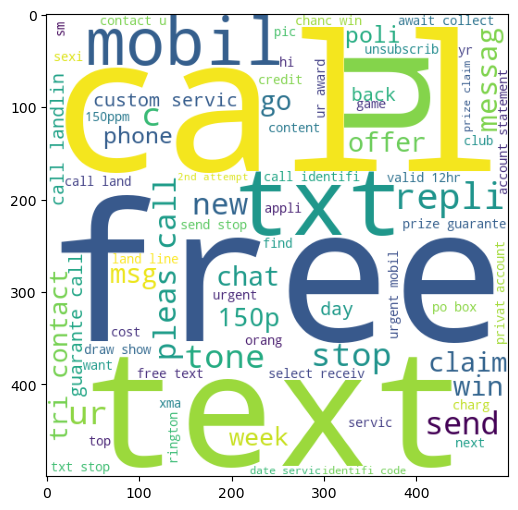

In [31]:
# Display the Spam WordCloud
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

### 8.2 Ham Word Cloud
Visualizing the most frequent words in Ham (legitimate) messages.

In [32]:
# Generate WordCloud for Ham (target=0)
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

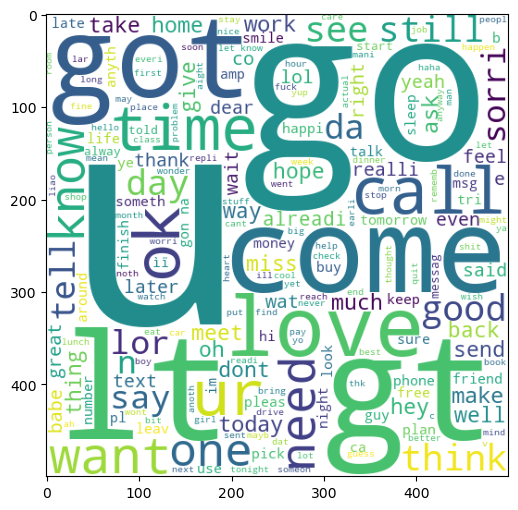

In [33]:
# Display the Ham WordCloud
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

## 9. Top Frequent Words Analysis
Identifying the top 30 most recurring words in each category.

### 9.1 Top 30 Spam Words

In [34]:
# Collect all words from Spam messages
spam_corpus = []
for messages in df[df['target'] == 1]['transformed_text'].tolist():
    for word in messages.split():
        spam_corpus.append(word)

In [35]:
# Print total number of words in spam corpus
len(spam_corpus)

9939

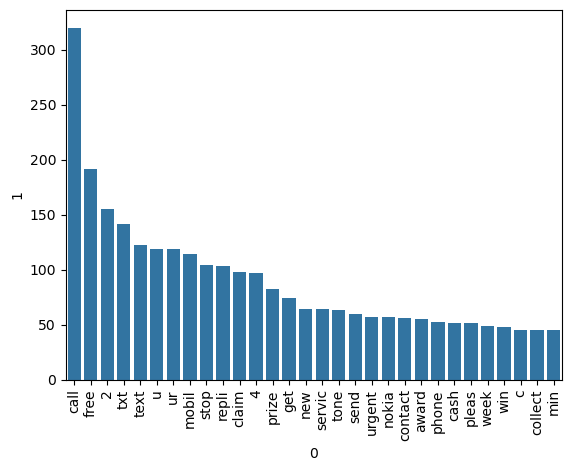

In [36]:
from collections import Counter

# Create a bar plot of the top 30 most common words in Spam
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 9.2 Top 30 Ham Words

In [37]:
# Collect all words from Ham messages
ham_corpus = []
for messages in df[df['target'] == 0]['transformed_text'].tolist():
    for word in messages.split():
        ham_corpus.append(word)

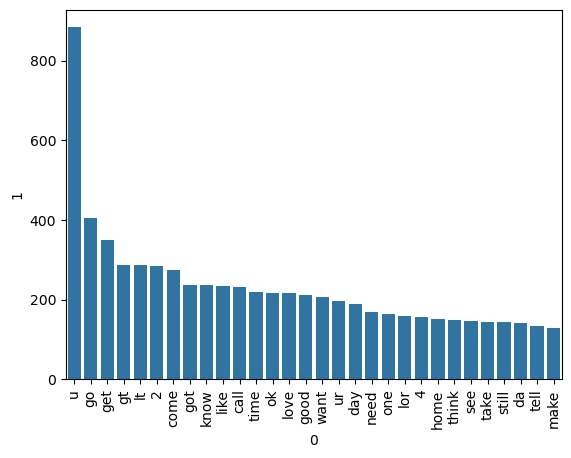

In [38]:
# Create a bar plot of the top 30 most common words in Ham
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv= CountVectorizer()
tfiidf= TfidfVectorizer()


In [58]:
X= tfiidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [59]:
y= df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 

In [63]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [64]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [65]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [66]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)   
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# tfidf-->mnb 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb= XGBClassifier(n_estimators=50, random_state=2)

In [79]:
clfs= {'SVC': svc,
      'KN': knc,
      'NB': mnb,
      'DT': dtc,
      'LR': lrc,
      'RF': rfc,
      'AdaBoost': abc,
      'BgC': bc,
      'ETC': etc,
      'GBDT': gbdt,
      'xgb': xgb}

In [80]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [81]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [82]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy =", current_accuracy)
    print("Precision =", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy = 0.9729206963249516
Precision = 0.9741379310344828
For KN
Accuracy = 0.9003868471953579
Precision = 1.0
For NB
Accuracy = 0.9593810444874274
Precision = 1.0
For DT
Accuracy = 0.9352030947775629
Precision = 0.8380952380952381
For LR
Accuracy = 0.9516441005802708
Precision = 0.94


c:\Users\Aarogya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Aarogya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For RF
Accuracy = 0.971953578336557
Precision = 1.0
For AdaBoost
Accuracy = 0.9245647969052224
Precision = 0.8409090909090909
For BgC
Accuracy = 0.9584139264990329
Precision = 0.8625954198473282
For ETC
Accuracy = 0.9729206963249516
Precision = 0.9824561403508771
For GBDT
Accuracy = 0.9526112185686654
Precision = 0.9238095238095239
For xgb
Accuracy = 0.9748549323017408
Precision = 0.9516129032258065


In [83]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by='Precision', ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
6,AdaBoost,0.924565,0.840909
